In [197]:
import pandas as pd

df1 = pd.read_csv("dataset_grupo1.csv", encoding="latin1", sep=";")
df2 = pd.read_csv("dataset2_grupo1.csv", encoding="latin1", sep=";")
df3 = pd.read_csv("dataset3_grupo1.csv", encoding="latin1", sep=";")
#Dados = planilhona com todas as info
dados = df1.merge(df2, on="Data").merge(df3, on="Data")

print(dados.head())


dados.to_csv("dataset_unificado.csv", index=False, encoding="utf-8-sig")

#conferindo os dados:
print(dados.isnull().sum())
#não há n.a values
print(dados['Data'].value_counts().sort_index())

#aparentemente tudo certo :)
dados.head()

      Data  \
0  12/2006   
1  01/2007   
2  02/2007   
3  03/2007   
4  04/2007   

  433 - Índice nacional de preços ao consumidor-amplo (IPCA) - Var. % mensal  \
0                                              0,48                            
1                                              0,44                            
2                                              0,44                            
3                                              0,37                            
4                                              0,25                            

  3695 - Taxa de câmbio - Livre - Dólar americano (compra) - Fim de período - mensal - u.m.c./US$  \
0                                            2,1372                                                 
1                                            2,1239                                                 
2                                            2,1174                                                 
3                             

,Data,433 - Índice nacional de preços ao consumidor-amplo (IPCA) - Var. % mensal,3695 - Taxa de câmbio - Livre - Dólar americano (compra) - Fim de período - mensal - u.m.c./US$,4380 - PIB mensal - Valores correntes (R$ milhões) - R$ (milhões),4469 - Dívida Líquida do Setor Público - Saldos em R$ milhões - Total - Governo Federal - R$ (milhões),4470 - Dívida Líquida do Setor Público - Saldos em R$ milhões - Total - Banco Central - R$ (milhões),4472 - Dívida Líquida do Setor Público - Saldos em R$ milhões - Total - Governos estaduais - R$ (milhões),4473 - Dívida Líquida do Setor Público - Saldos em R$ milhões - Total - Governos municipais - R$ (milhões),13761 - Dívida bruta do governo geral - Saldos em R$ milhões - Metodologia utilizada a partir de 2008 - R$ (milhões),13762 - Dívida bruta do governo geral (% PIB) - Metodologia utilizada a partir de 2008 - %,"13763 - Dívida bruta do governo geral - Saldos em US$ milhões - Metodologia utilizada a partir de 2008 - US$ (milhões),,,,,,,,,,",4189 - Taxa de juros - Selic acumulada no mês anualizada base 252 - % a.a.,"4390 - Taxa de juros - Selic acumulada no mês - % a.m.,,","29037 - Endividamento das famílias com o Sistema Financeiro Nacional em relação à renda acumulada dos últimos doze meses (RNDBF) - %,"
0,12/2006,"0,48","2,1372","215.338,3","727.318,55","8.481,33","316.863,54","47.073,27","1.336.644,90","55,48","625.418,73","13,19","0,99","21,98"
1,01/2007,"0,44","2,1239","206.662,3","739.728,91","-4.509,71","316.460,09","46.447,36","1.367.451,91","56,17","643.840,6","13,13","1,8","22,28"
2,02/2007,"0,44","2,1174","201.552,1","747.648,62","-4.194,13","317.158,09","46.653,24","1.399.083,71","56,90","660.755,51","12,93","0,87","22,48"
3,03/2007,"0,37","2,0496","223.208,6","750.319,85","5.830,79","316.163,14","46.477,56","1.423.273,45","57,24","694.415,23","12,74","1,5","22,4"
4,04/2007,"0,25","2,0331","218.931,2","745.927,20","7.990,12","314.070,80","46.673,09","1.438.854,85","57,17","707.714,75","12,58","0,94","22,36"


/tmp/ipykernel_12043/2286414392.py:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  dados["Dívida Bruta (R$ mi)"] = dados["13761 - Dívida bruta do governo geral - Saldos em R$ milhões - Metodologia utilizada a partir de 2008 - R$ (milhões)"].str.replace(".", "").str.replace(",", ".").astype(float)


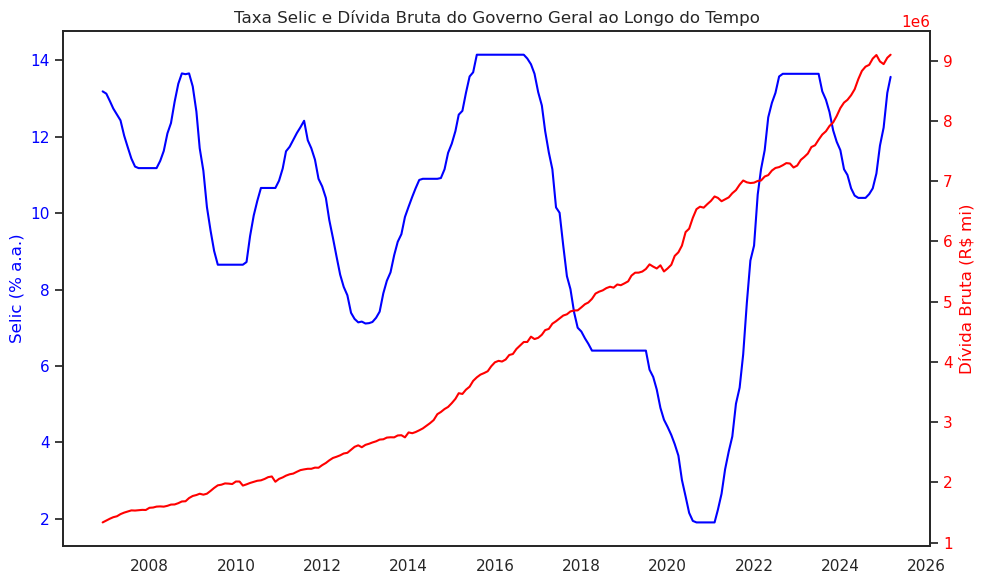

In [198]:
import matplotlib.pyplot as plt

#Taxa SELIC e Dívida Bruta
dados["Data"] = pd.to_datetime(dados["Data"], format="%m/%Y")

dados["Selic (% a.a.)"] = dados["4189 - Taxa de juros - Selic acumulada no mês anualizada base 252 - % a.a."].str.replace(",", ".").astype(float)
dados["Dívida Bruta (R$ mi)"] = dados["13761 - Dívida bruta do governo geral - Saldos em R$ milhões - Metodologia utilizada a partir de 2008 - R$ (milhões)"].str.replace(".", "").str.replace(",", ".").astype(float)

fig, ax1 = plt.subplots(figsize=(10, 6))

#Eixo Selic
ax1.plot(dados["Data"], dados["Selic (% a.a.)"], color='blue', label="Selic (% a.a.)")
ax1.set_ylabel("Selic (% a.a.)", color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

#Eixo da Dívida
ax2 = ax1.twinx()
ax2.plot(dados["Data"], dados["Dívida Bruta (R$ mi)"], color='red', label="Dívida Bruta (R$ milhões)")
ax2.set_ylabel("Dívida Bruta (R$ mi)", color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title("Taxa Selic e Dívida Bruta do Governo Geral ao Longo do Tempo")
fig.tight_layout()
plt.show()

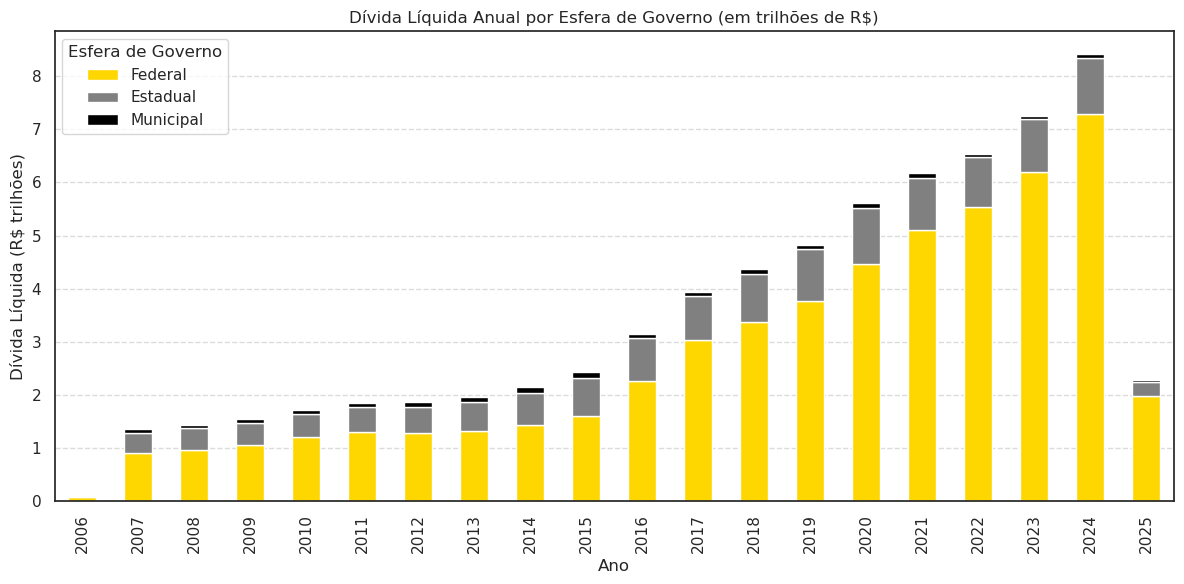

In [199]:
import pandas as pd
import matplotlib.pyplot as plt

# Converter a coluna 'Data' para datetime
dados["Data"] = pd.to_datetime(dados["Data"], format="%m/%Y")
dados["Ano"] = dados["Data"].dt.year

# Converter dívidas para float e transformar em trilhões (dividido por 1.000.000)
dados["Federal"] = dados["4469 - Dívida Líquida do Setor Público - Saldos em R$ milhões - Total - Governo Federal - R$ (milhões)"]\
    .str.replace(".", "", regex=False).str.replace(",", ".", regex=False).astype(float) / 10_000_000

dados["Estadual"] = dados["4472 - Dívida Líquida do Setor Público - Saldos em R$ milhões - Total - Governos estaduais - R$ (milhões)"]\
    .str.replace(".", "", regex=False).str.replace(",", ".", regex=False).astype(float) / 10_000_000

dados["Municipal"] = dados["4473 - Dívida Líquida do Setor Público - Saldos em R$ milhões - Total - Governos municipais - R$ (milhões)"]\
    .str.replace(".", "", regex=False).str.replace(",", ".", regex=False).astype(float) / 10_000_000

# Agrupar por ano e somar as dívidas
dividas_anuais = dados.groupby("Ano")[["Federal", "Estadual", "Municipal"]].sum()

# Reordenar colunas para coincidir com as cores desejadas
dividas_anuais = dividas_anuais[["Federal", "Estadual", "Municipal"]]

# Cores: Federal (amarelo), Estadual (cinza), Municipal (preto)
colors = ["gold", "gray", "black"]

# Plotar gráfico
dividas_anuais.plot(
    kind="bar",
    stacked=True,
    figsize=(12, 6),
    color=colors
)

plt.title("Dívida Líquida Anual por Esfera de Governo (em trilhões de R$)")
plt.xlabel("Ano")
plt.ylabel("Dívida Líquida (R$ trilhões)")
plt.legend(["Federal", "Estadual", "Municipal"], title="Esfera de Governo")
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



In [200]:
#relação entre o crescimento da dívida do governo e as variações da selic
import pandas as pd

dados["Data"] = pd.to_datetime(dados["Data"], format="%m/%Y")

dados["Selic (% a.a.)"] = dados["4189 - Taxa de juros - Selic acumulada no mês anualizada base 252 - % a.a."].str.replace(",", ".").astype(float)
dados["Dívida Bruta (R$ mi)"] = dados["13761 - Dívida bruta do governo geral - Saldos em R$ milhões - Metodologia utilizada a partir de 2008 - R$ (milhões)"].str.replace(".", "").str.replace(",", ".").astype(float)

dados["Dívida Aumento (R$ mi)"] = dados["Dívida Bruta (R$ mi)"].diff()

dados = dados.dropna(subset=["Dívida Aumento (R$ mi)"])

correlacao = dados["Selic (% a.a.)"].corr(dados["Dívida Aumento (R$ mi)"])

print(correlacao)

-0.05568478790529951


/tmp/ipykernel_12043/3688410708.py:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  dados["Dívida Bruta (R$ mi)"] = dados["13761 - Dívida bruta do governo geral - Saldos em R$ milhões - Metodologia utilizada a partir de 2008 - R$ (milhões)"].str.replace(".", "").str.replace(",", ".").astype(float)


In [201]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Converter para float (mantendo nomes originais das colunas)
dados["4390 - Taxa de juros - Selic acumulada no mês - % a.m.,,"] = dados["4390 - Taxa de juros - Selic acumulada no mês - % a.m.,,"].str.replace(",", ".").astype(float)
dados["433 - Índice nacional de preços ao consumidor-amplo (IPCA) - Var. % mensal"] = dados["433 - Índice nacional de preços ao consumidor-amplo (IPCA) - Var. % mensal"].str.replace(",", ".").astype(float)

# Calcular a correlação
correlacao_selic_ipca = dados["4390 - Taxa de juros - Selic acumulada no mês - % a.m.,,"].corr(
    dados["433 - Índice nacional de preços ao consumidor-amplo (IPCA) - Var. % mensal"]
)
print(correlacao_selic_ipca)


-0.04345195092591911


In [202]:
#correlação e rquadrado
correlacao = dados["Selic (% a.a.)"].corr(dados["Dívida Bruta (R$ mi)"])
print(correlacao)
rquadrado = correlacao ** 2
print(rquadrado)
#resultado tá bem baixo, imagino que tenham outros fatores que estejam no meio dificultando a análise

-0.17354908965195615
0.030119286519022712


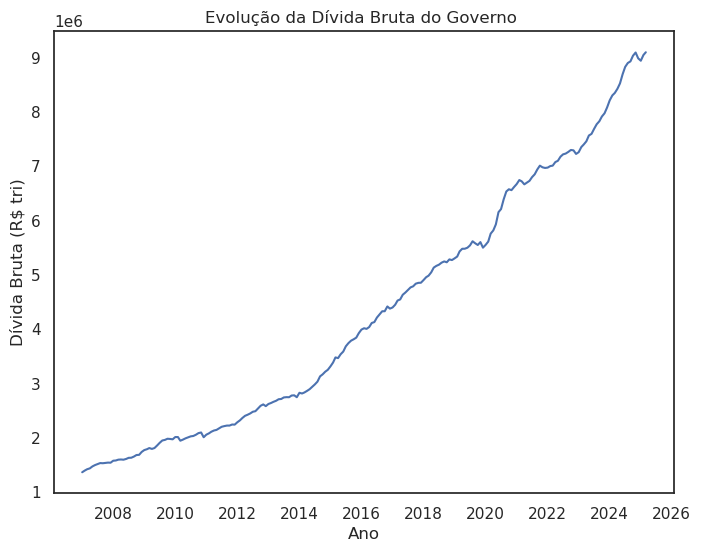

In [203]:
#crescimento Dívida Bruta em linhas, gráfico legal pra introduzir

plt.figure(figsize=(8,6))
sns.lineplot(data=dados, x="Data", y="Dívida Bruta (R$ mi)")
plt.title("Evolução da Dívida Bruta do Governo ")
plt.xlabel("Ano")
plt.ylabel("Dívida Bruta (R$ tri)")
plt.show()



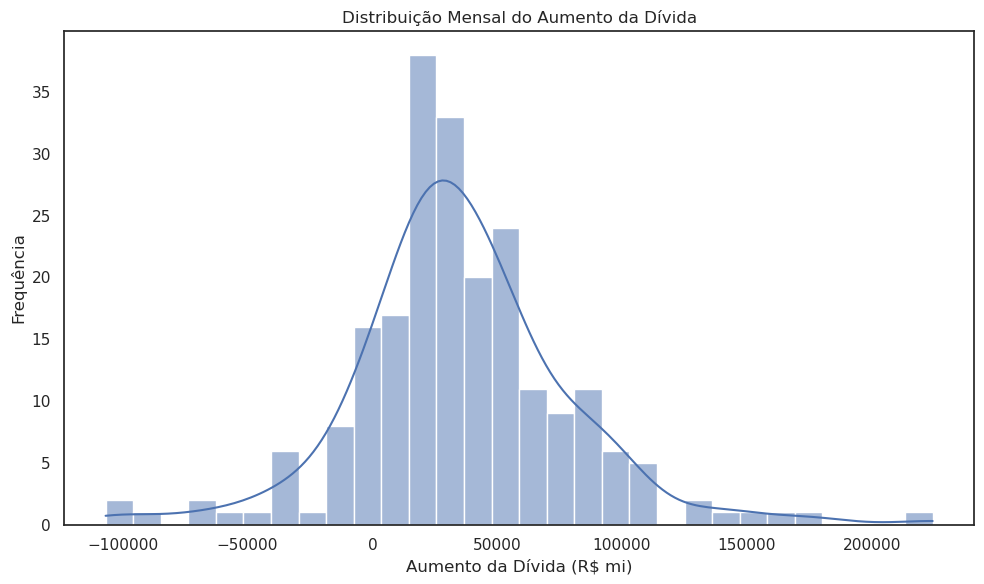

In [204]:
#histograma

plt.figure(figsize=(10, 6))
sns.histplot(dados["Dívida Aumento (R$ mi)"], bins=30, kde=True)
plt.title("Distribuição Mensal do Aumento da Dívida")
plt.xlabel("Aumento da Dívida (R$ mi)")
plt.ylabel("Frequência")
plt.tight_layout()
plt.show()


/tmp/ipykernel_12043/327460902.py:46: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(


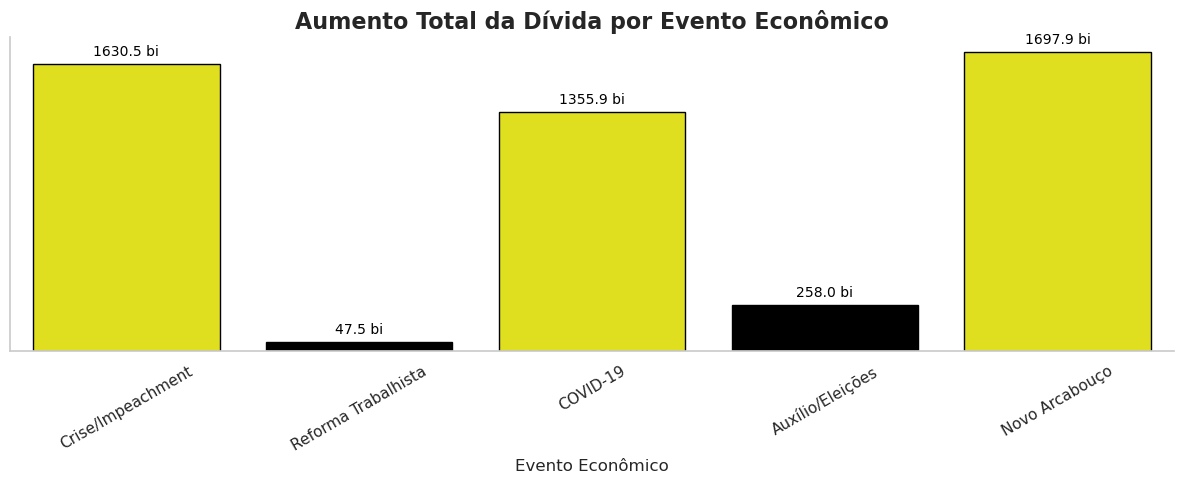

In [205]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Função para classificar eventos econômicos
def evento(data):
    if pd.Timestamp("2014-01-01") <= data <= pd.Timestamp("2016-12-31"):
        return "Crise/Impeachment"
    elif pd.Timestamp("2017-07-01") <= data <= pd.Timestamp("2017-07-31"):
        return "Reforma Trabalhista"
    elif pd.Timestamp("2020-03-01") <= data <= pd.Timestamp("2021-12-31"):
        return "COVID-19"
    elif pd.Timestamp("2022-01-01") <= data <= pd.Timestamp("2022-12-31"):
        return "Auxílio/Eleições"
    elif data >= pd.Timestamp("2023-04-01"):
        return "Novo Arcabouço"
    else:
        return "Outros"

# Pré-processamento
dados["Data"] = pd.to_datetime(dados["Data"], format="%m/%Y")
dados["Evento_Econômico"] = dados["Data"].apply(evento)
dados["Dívida Bruta (R$ mi)"] = dados[
    "13761 - Dívida bruta do governo geral - Saldos em R$ milhões - Metodologia utilizada a partir de 2008 - R$ (milhões)"
].str.replace(".", "", regex=False).str.replace(",", ".", regex=False).astype(float)
dados["Dívida Aumento (R$ mi)"] = dados["Dívida Bruta (R$ mi)"].diff()
dados = dados.dropna(subset=["Dívida Aumento (R$ mi)"])
dados_filtrados = dados[dados["Evento_Econômico"] != "Outros"]

# Lista de eventos na ordem desejada
ordem_eventos = ["Crise/Impeachment", "Reforma Trabalhista", "COVID-19", "Auxílio/Eleições", "Novo Arcabouço"]

# Cores personalizadas
cores_personalizadas = {
    "Crise/Impeachment": "yellow",
    "Reforma Trabalhista": "black",
    "COVID-19": "yellow",
    "Auxílio/Eleições": "black",
    "Novo Arcabouço": "yellow"
}

# Gráfico
plt.figure(figsize=(12, 5))
sns.set_style("whitegrid")
ax = sns.barplot(
    data=dados_filtrados,
    x="Evento_Econômico",
    y="Dívida Aumento (R$ mi)",  # Usando valores em milhões
    estimator=np.sum,
    ci=None,
    palette=[cores_personalizadas[evento] for evento in ordem_eventos],
    order=ordem_eventos,
    edgecolor="black"
)

# Títulos e eixos
plt.title("Aumento Total da Dívida por Evento Econômico", fontsize=16, fontweight='bold')
plt.xlabel("Evento Econômico", fontsize=12)
plt.ylabel("")  # Sem rótulo no eixo Y
plt.xticks(rotation=30, fontsize=11)
plt.yticks([])

# Rótulos nas barras com valores em bilhões
for p in ax.patches:
    height = p.get_height()
    label = f'{height / 1_000:.1f} bi'
    ax.annotate(label, (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 4),
                textcoords='offset points')

# Remover bordas do gráfico
sns.despine()
plt.tight_layout()
plt.show()


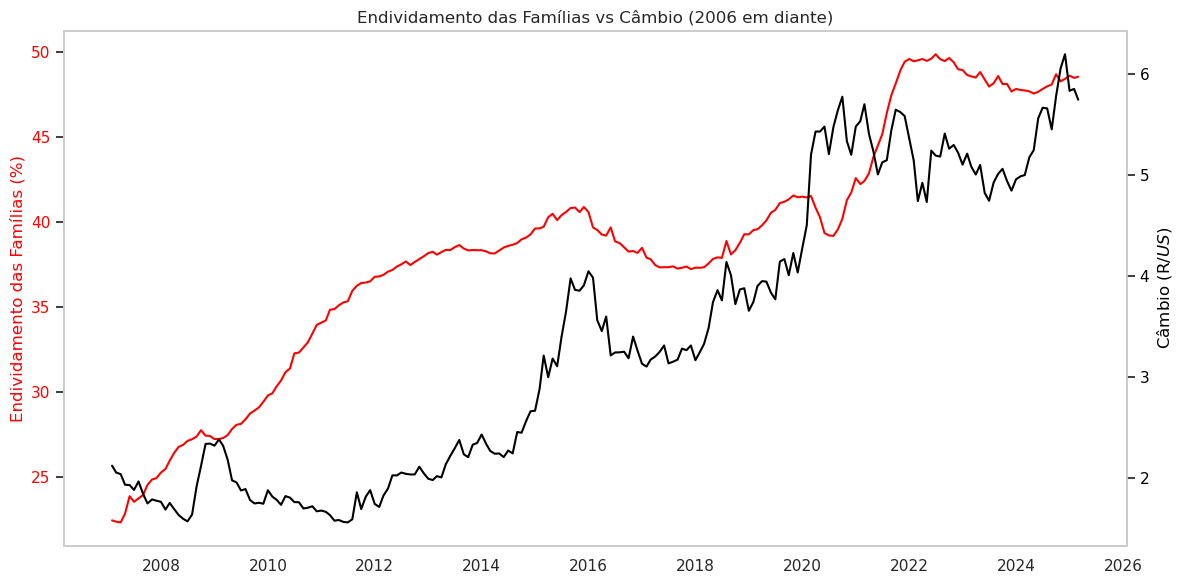

In [206]:
import pandas as pd
import matplotlib.pyplot as plt

# Corrigir tipos
dados["Cambio (R$/US$)"] = dados["3695 - Taxa de câmbio - Livre - Dólar americano (compra) - Fim de período - mensal - u.m.c./US$"]\
    .astype(str).str.replace(",", ".").astype(float)

dados["Endividamento Famílias (%)"] = dados["29037 - Endividamento das famílias com o Sistema Financeiro Nacional em relação à renda acumulada dos últimos doze meses (RNDBF) - %,"]\
    .astype(str).str.replace(",", ".").astype(float)

# Converter a data
dados["Data"] = pd.to_datetime(dados["Data"], format="%m/%Y")

# Criar gráfico com dois eixos
fig, ax1 = plt.subplots(figsize=(12, 6))

# Linha vermelha - Endividamento
ax1.plot(dados["Data"], dados["Endividamento Famílias (%)"], color='red', label='Endividamento das Famílias (%)')
ax1.set_ylabel("Endividamento das Famílias (%)", color='red')
ax1.tick_params(axis='y', labelcolor='red')

# Linha preta - Câmbio
ax2 = ax1.twinx()
ax2.plot(dados["Data"], dados["Cambio (R$/US$)"], color='black', label='Câmbio (R$/US$)')
ax2.set_ylabel("Câmbio (R$/US$)", color='black')
ax2.tick_params(axis='y', labelcolor='black')

# Estilo final
plt.title("Endividamento das Famílias vs Câmbio (2006 em diante)")
ax1.grid(False)  # Remove grade eixo 1
ax2.grid(False)  # Remove grade eixo 2
fig.tight_layout()
plt.show()


In [207]:
# Calcular a correlação entre Câmbio e Endividamento das Famílias
df_corr = dados.dropna(subset=["Cambio (R$/US$)", "Endividamento Famílias (%)"])
correlacao = df_corr["Cambio (R$/US$)"].corr(df_corr["Endividamento Famílias (%)"])

# Imprimir resultado
print(f"Correlação entre Câmbio e Endividamento das Famílias: {correlacao:.4f}")


Correlação entre Câmbio e Endividamento das Famílias: 0.8219


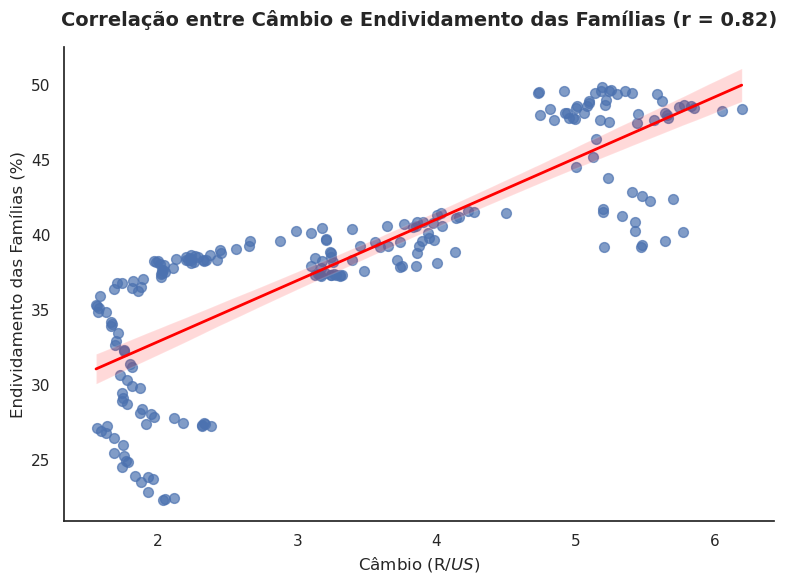

In [208]:
import seaborn as sns
import matplotlib.pyplot as plt

# Remover valores ausentes
df_corr = dados.dropna(subset=["Cambio (R$/US$)", "Endividamento Famílias (%)"])

# Calcular correlação
correlacao = df_corr["Cambio (R$/US$)"].corr(df_corr["Endividamento Famílias (%)"])

# Gráfico
plt.figure(figsize=(8, 6))
sns.set(style="white")

sns.regplot(
    data=df_corr,
    x="Cambio (R$/US$)",
    y="Endividamento Famílias (%)",
    scatter_kws={"s": 50, "alpha": 0.7},
    line_kws={"color": "red", "linewidth": 2}
)

plt.title(f"Correlação entre Câmbio e Endividamento das Famílias (r = {correlacao:.2f})", fontsize=14, fontweight='bold', pad=15)
plt.xlabel("Câmbio (R$/US$)", fontsize=12)
plt.ylabel("Endividamento das Famílias (%)", fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

plt.grid(False)
plt.tight_layout()
sns.despine()
plt.show()


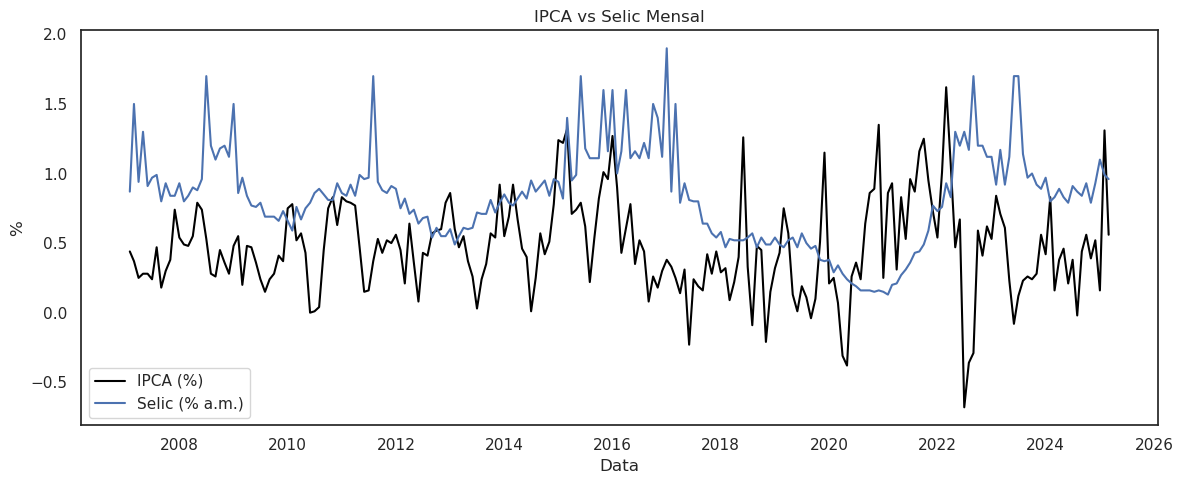

In [209]:
plt.figure(figsize=(12,5))
plt.plot(dados["Data"], dados["433 - Índice nacional de preços ao consumidor-amplo (IPCA) - Var. % mensal"], label="IPCA (%)", color = "black")
plt.plot(dados["Data"], dados["4390 - Taxa de juros - Selic acumulada no mês - % a.m.,,"], label="Selic (% a.m.)",)
plt.title("IPCA vs Selic Mensal")
plt.xlabel("Data")
plt.ylabel("%")
plt.legend()
plt.tight_layout()
plt.show()


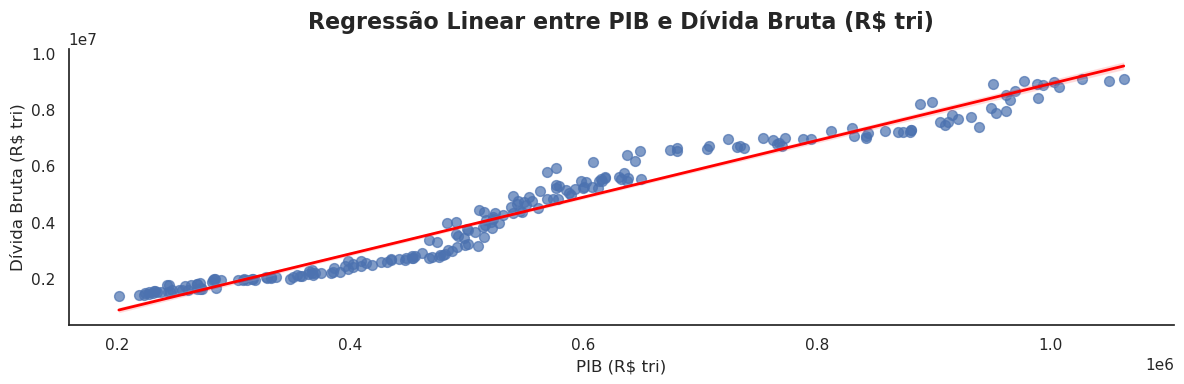

Correlação entre PIB e Dívida Bruta (R$ mi): 0.9798


In [210]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Dicionário com nomes técnicos → nomes claros
colunas_renomeadas = {
    "4380 - PIB mensal - Valores correntes (R$ milhões) - R$ (milhões)": "PIB (R$ mi)",
    "13761 - Dívida bruta do governo geral - Saldos em R$ milhões - Metodologia utilizada a partir de 2008 - R$ (milhões)": "Dívida Bruta (R$ mi)",
    "13762 - Dívida bruta do governo geral (% PIB) - Metodologia utilizada a partir de 2008 - %": "Dívida Bruta (% do PIB)"
}

# Conversão para float
for col in colunas_renomeadas:
    dados[col] = dados[col].astype(str)\
        .str.replace(".", "", regex=False)\
        .str.replace(",", ".", regex=False)\
        .astype(float)

# Renomear as colunas
dados_corr = dados[list(colunas_renomeadas.keys())].rename(columns=colunas_renomeadas)

# Gráfico de regressão linear entre PIB e Dívida Bruta (valores nominais)
plt.figure(figsize=(12, 4))
sns.set(style="white")  # Remove a grade

sns.regplot(
    data=dados_corr,
    x="PIB (R$ mi)",
    y="Dívida Bruta (R$ mi)",
    scatter_kws={"s": 50, "alpha": 0.7},
    line_kws={"color": "red", "linewidth": 2}
)

plt.title("Regressão Linear entre PIB e Dívida Bruta (R$ tri)", fontsize=16, fontweight='bold', pad=15)
plt.xlabel("PIB (R$ tri)", fontsize=12)
plt.ylabel("Dívida Bruta (R$ tri)", fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

plt.grid(False)  # Desativa a grade manualmente, se necessário
plt.tight_layout()
sns.despine()
plt.show()

# Calcular a correlação entre PIB e Dívida Bruta (valores nominais)
correlacao = dados_corr["PIB (R$ mi)"].corr(dados_corr["Dívida Bruta (R$ mi)"])

# Imprimir a correlação
print(f"Correlação entre PIB e Dívida Bruta (R$ mi): {correlacao:.4f}")


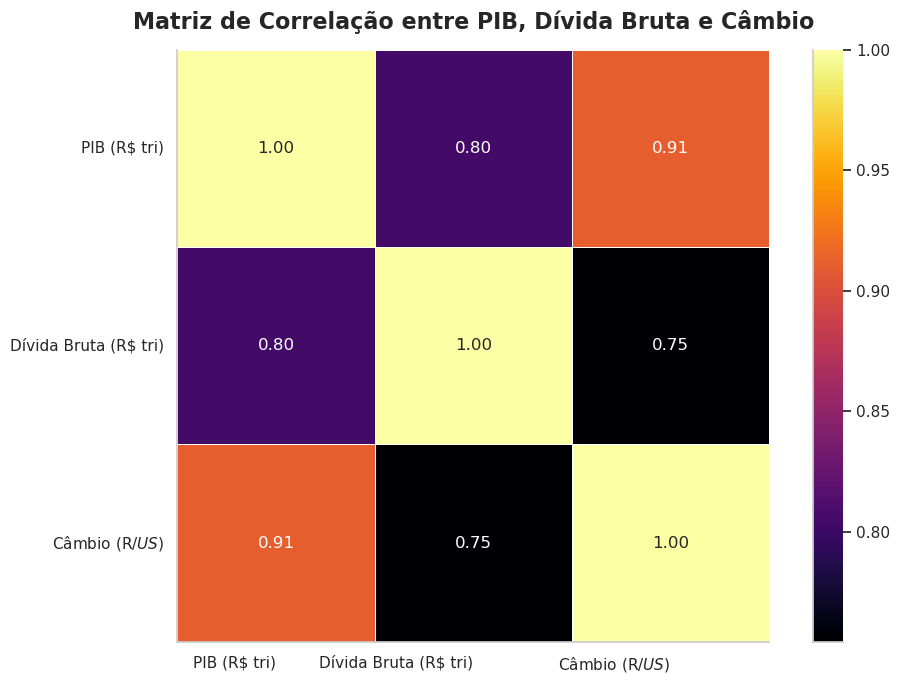

In [211]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Dicionário com nomes técnicos → nomes claros
colunas_renomeadas = {
    "4380 - PIB mensal - Valores correntes (R$ milhões) - R$ (milhões)": "PIB (R$ tri)",
    "13761 - Dívida bruta do governo geral - Saldos em R$ milhões - Metodologia utilizada a partir de 2008 - R$ (milhões)": "Dívida Bruta (R$ tri)",
    "3695 - Taxa de câmbio - Livre - Dólar americano (compra) - Fim de período - mensal - u.m.c./US$": "Câmbio (R$/US$)"
}

# Conversão para float (com substituição de . e ,)
for col in colunas_renomeadas:
    dados[col] = dados[col].astype(str) \
        .str.replace(".", "", regex=False) \
        .str.replace(",", ".", regex=False) \
        .astype(float)

# Criar um novo DataFrame com os nomes claros
dados_corr = dados[list(colunas_renomeadas.keys())].rename(columns=colunas_renomeadas)

# Remover possíveis valores ausentes
dados_corr = dados_corr.dropna()

# Calcular a matriz de correlação
matriz = dados_corr.corr()

# Plot do heatmap
plt.figure(figsize=(10, 7))
sns.set(style="whitegrid")

ax = sns.heatmap(
    matriz,
    annot=True,
    fmt=".2f",
    cmap="inferno",
    linewidths=0.5,
    square=True,
    annot_kws={"fontsize": 12}
)

plt.title("Matriz de Correlação entre PIB, Dívida Bruta e Câmbio", fontsize=16, fontweight='bold', pad=15)
plt.xticks(fontsize=11, rotation=0, ha='right')
plt.yticks(fontsize=11, rotation=0)
plt.tight_layout()
sns.despine()
plt.show()



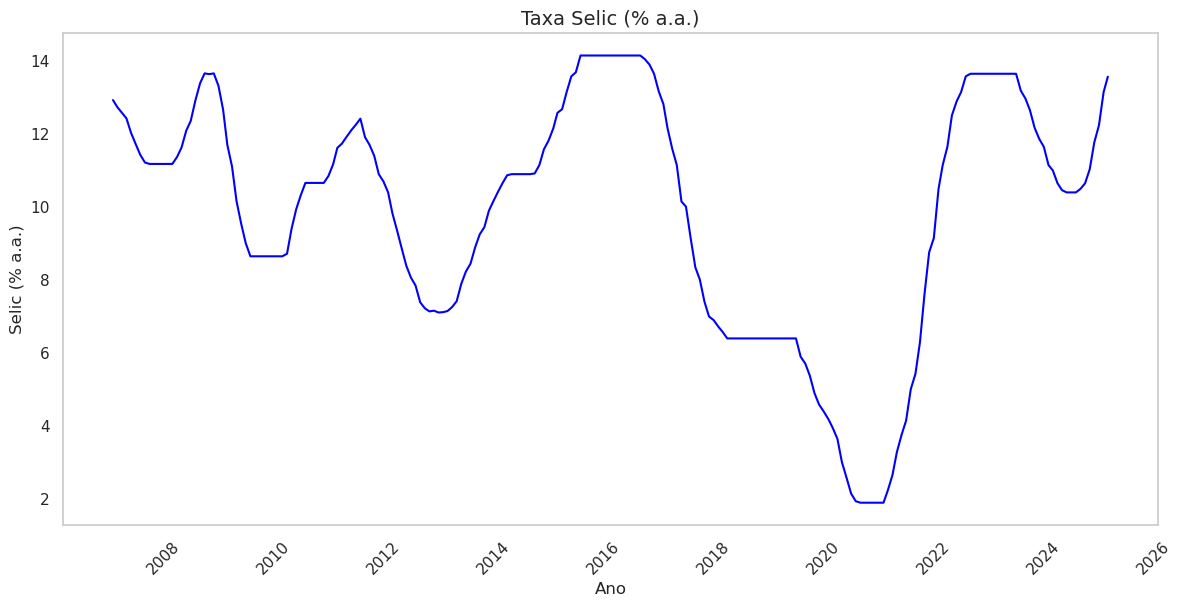

Correlação entre Selic e aumento da dívida: -0.0553


In [212]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=dados, x="Data", y="Selic (% a.a.)", color='blue')
plt.title("Taxa Selic (% a.a.)", fontsize=14)
plt.xlabel("Ano")
plt.ylabel("Selic (% a.a.)")
plt.grid(False)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

correlacao = dados["Selic (% a.a.)"].corr(dados["Dívida Aumento (R$ mi)"])
print(f"Correlação entre Selic e aumento da dívida: {correlacao:.4f}")



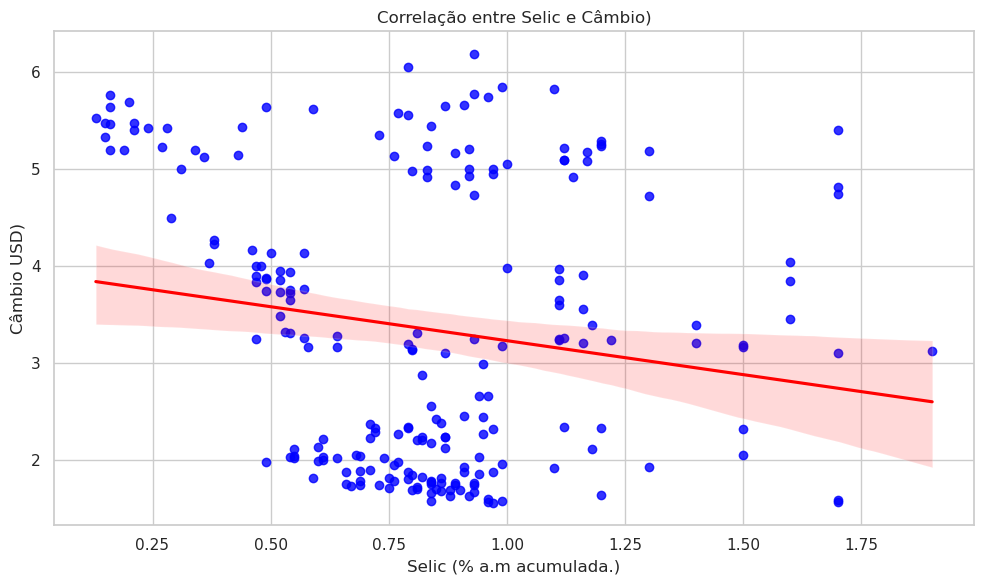

In [213]:
#refazr

import seaborn as sns
import matplotlib.pyplot as plt

dados["Selic (% a.m.)"] = dados["4390 - Taxa de juros - Selic acumulada no mês - % a.m.,,"].astype(str).str.replace(",", ".").astype(float)
dados["Câmbio (R$/US$)"] = dados["3695 - Taxa de câmbio - Livre - Dólar americano (compra) - Fim de período - mensal - u.m.c./US$"].astype(str).str.replace(",", ".").astype(float)

plt.figure(figsize=(10, 6))
sns.regplot(
    x=dados["Selic (% a.m.)"],
    y=dados["Câmbio (R$/US$)"],
    scatter_kws={"color": "blue"},
    line_kws={"color": "red"},
)
plt.title("Correlação entre Selic e Câmbio)")
plt.xlabel("Selic (% a.m acumulada.)")
plt.ylabel("Câmbio USD)")
plt.grid(True)
plt.tight_layout()
plt.show()


In [214]:
# Renomear as colunas relevantes
dados = dados.rename(columns={
    'Data': 'Data',
    '433 - Índice nacional de preços ao consumidor-amplo (IPCA) - Var. % mensal': 'IPCA (%)',
    '29037 - Endividamento das famílias com o Sistema Financeiro Nacional em relação à renda acumulada dos últimos doze meses (RNDBF) - %,': 'Endividamento (%)'
})

# Converter a coluna de data
dados['Data'] = pd.to_datetime(dados['Data'], format="%m/%Y")

# Substituir vírgulas por pontos e converter para float
dados['IPCA (%)'] = dados['IPCA (%)'].replace(',', '.').astype(float)
dados['Endividamento (%)'] = dados['Endividamento (%)'].str.replace(',', '.').astype(float)

# Verificar se os dados estão prontos para análise
dados[['Data', 'IPCA (%)', 'Endividamento (%)']].head()


,Data,IPCA (%),Endividamento (%)
2,2007-02-01,0.44,22.48
3,2007-03-01,0.37,22.40
4,2007-04-01,0.25,22.36
5,2007-05-01,0.28,22.88
6,2007-06-01,0.28,23.90


In [215]:
from scipy.stats import pearsonr, spearmanr, kendalltau
import pandas as pd
import matplotlib.pyplot as plt

dados["Dívida Bruta (R$ mi)"] = dados["13761 - Dívida bruta do governo geral - Saldos em R$ milhões - Metodologia utilizada a partir de 2008 - R$ (milhões)"]\
    .replace(".", "", regex=False).replace(",", ".", regex=False).astype(float)

dados["Câmbio (R$/US$)"] = dados["3695 - Taxa de câmbio - Livre - Dólar americano (compra) - Fim de período - mensal - u.m.c./US$"]\
    .replace(",", ".", regex=False).astype(float)

divida_bruta = dados["Dívida Bruta (R$ mi)"]
cambio = dados["Câmbio (R$/US$)"]

#correlação de pearson
pearson_corr, _ = pearsonr(divida_bruta, cambio)
print(f"Correlação de Pearson (linear):  {pearson_corr:.4f}")

#rquadrado
rsquared = pearson_corr ** 2
print(f"R quadrado é:  {rsquared:.4f}")




Correlação de Pearson (linear):  0.7544
R quadrado é:  0.5691


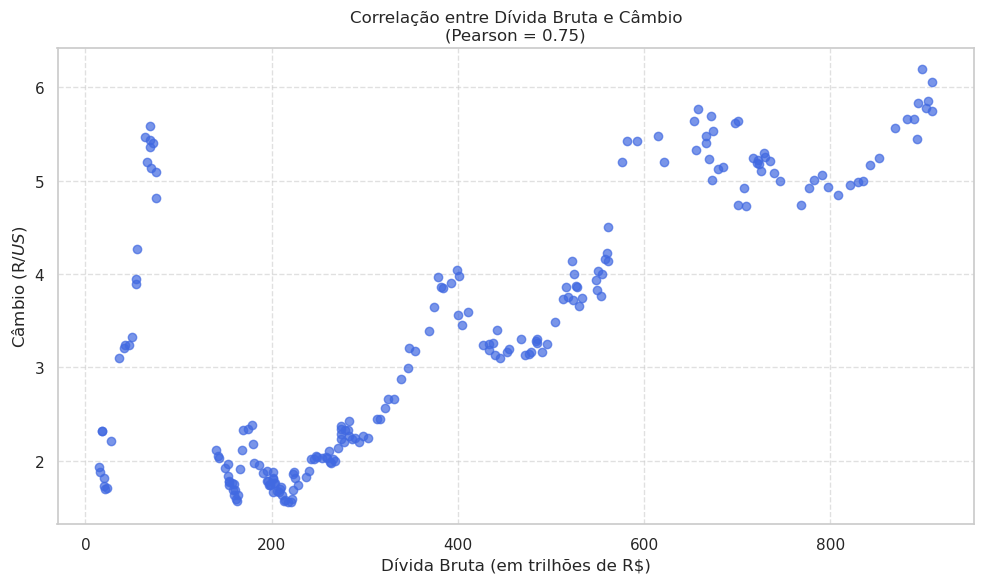

In [216]:
plt.figure(figsize=(10, 6))
plt.scatter(divida_bruta / 1_000_000, cambio, alpha=0.7, color="royalblue")
plt.title(f"Correlação entre Dívida Bruta e Câmbio\n(Pearson = {pearson_corr:.2f})")
plt.xlabel("Dívida Bruta (em trilhões de R$)")
plt.ylabel("Câmbio (R$/US$)")
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

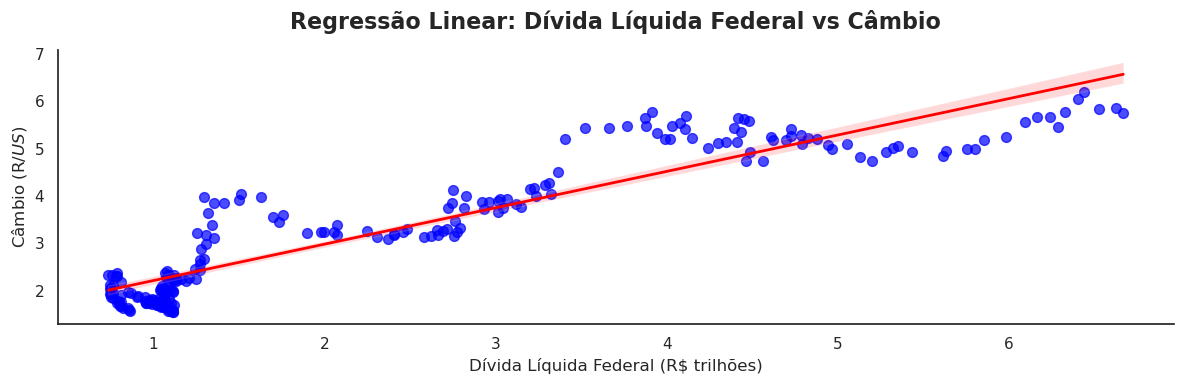

In [217]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

dados["Dívida Líquida Federal (R$ tri)"] = dados["4469 - Dívida Líquida do Setor Público - Saldos em R$ milhões - Total - Governo Federal - R$ (milhões)"]\
    .str.replace(".", "", regex=False).str.replace(",", ".", regex=False).astype(float) / 1_000_000  # convertendo p/ trilhões

dados["Câmbio (R$/US$)"] = dados["3695 - Taxa de câmbio - Livre - Dólar americano (compra) - Fim de período - mensal - u.m.c./US$"]\
    .replace(",", ".", regex=False).astype(float)

dados_corr = dados[["Dívida Líquida Federal (R$ tri)", "Câmbio (R$/US$)"]]

# Estilo do gráfico
plt.figure(figsize=(12, 4))
sns.set(style="white")

# Gráfico de regressão
sns.regplot(
    data=dados_corr,
    x="Dívida Líquida Federal (R$ tri)",
    y="Câmbio (R$/US$)",
    scatter_kws={"s": 50, "alpha": 0.7, "color": "blue"},
    line_kws={"color": "red", "linewidth": 2}
)

plt.title("Regressão Linear: Dívida Líquida Federal vs Câmbio", fontsize=16, fontweight='bold', pad=15)
plt.xlabel("Dívida Líquida Federal (R$ trilhões)", fontsize=12)
plt.ylabel("Câmbio (R$/US$)", fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

plt.grid(False)
plt.tight_layout()
sns.despine()
plt.show()


In [218]:
#relação entre o crescimento da dívida do governo e as variações da selic
import pandas as pd

dados["Data"] = pd.to_datetime(dados["Data"], format="%m/%Y")

dados["Selic (% a.a.)"] = dados["4189 - Taxa de juros - Selic acumulada no mês anualizada base 252 - % a.a."].str.replace(",", ".").astype(float)
dados["Dívida Bruta (R$ mi)"] = dados["13761 - Dívida bruta do governo geral - Saldos em R$ milhões - Metodologia utilizada a partir de 2008 - R$ (milhões)"].replace(".", "").replace(",", ".").astype(float)

dados["Dívida Aumento (R$ mi)"] = dados["Dívida Bruta (R$ mi)"].diff()

dados = dados.dropna(subset=["Dívida Aumento (R$ mi)"])

correlacao = dados["Selic (% a.a.)"].corr(dados["Dívida Aumento (R$ mi)"])

print(correlacao)

0.008765352693696675


In [219]:
#correlação e rquadrado
correlacao = dados["Selic (% a.a.)"].corr(dados["Dívida Bruta (R$ mi)"])
print(correlacao)
rquadrado = correlacao ** 2
print(rquadrado)
#resultado tá bem baixo, imagino que tenham outros fatores que estejam no meio dificultando a análise

-0.11223636753355118
0.01259700219712638


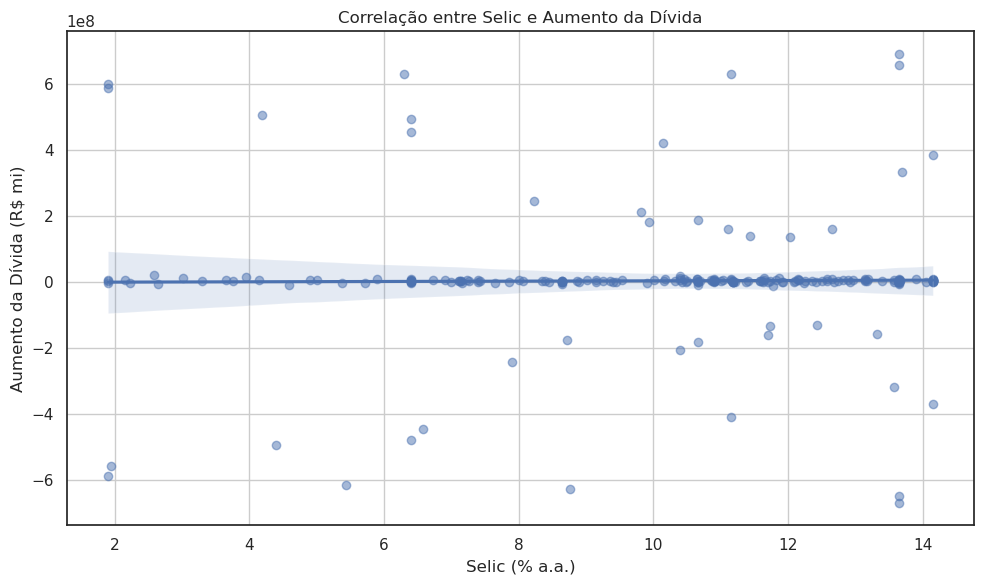

In [220]:
#é a mesma correlação do heatmap, mas fiz em outro tipo de graph.

plt.figure(figsize=(10, 6))
sns.regplot(x="Selic (% a.a.)", y="Dívida Aumento (R$ mi)", data=dados, scatter_kws={"alpha":0.5})
plt.title("Correlação entre Selic e Aumento da Dívida")
plt.xlabel("Selic (% a.a.)")
plt.ylabel("Aumento da Dívida (R$ mi)")
plt.grid(True)
plt.tight_layout()
plt.show()


In [221]:
#Endividamento das famílias e Taxa de Juros

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

df = pd.read_csv("dataset_unificado.csv")

df["Data"] = pd.to_datetime(df["Data"], format="%m/%Y")
endividamento = df["29037 - Endividamento das famílias com o Sistema Financeiro Nacional em relação à renda acumulada dos últimos doze meses (RNDBF) - %,"]
selic = df["4189 - Taxa de juros - Selic acumulada no mês anualizada base 252 - % a.a."]

endividamento = endividamento.astype(str).str.replace(",", ".").astype(float)
selic = selic.astype(str).str.replace(",", ".").astype(float)

#Novo dataframe com as colunas de interesse
endividamento_e_selic = pd.DataFrame({"Data" : df["Data"], 
                                      "Endividamento das famílias" : endividamento,
                                      "Taxa de Juros" : selic
                                      })

print(endividamento_e_selic)

          Data  Endividamento das famílias  Taxa de Juros
0   2006-12-01                       21.98          13.19
1   2007-01-01                       22.28          13.13
2   2007-02-01                       22.48          12.93
3   2007-03-01                       22.40          12.74
4   2007-04-01                       22.36          12.58
..         ...                         ...            ...
215 2024-11-01                       48.29          11.04
216 2024-12-01                       48.43          11.77
217 2025-01-01                       48.62          12.24
218 2025-02-01                       48.49          13.15
219 2025-03-01                       48.56          13.57

[220 rows x 3 columns]


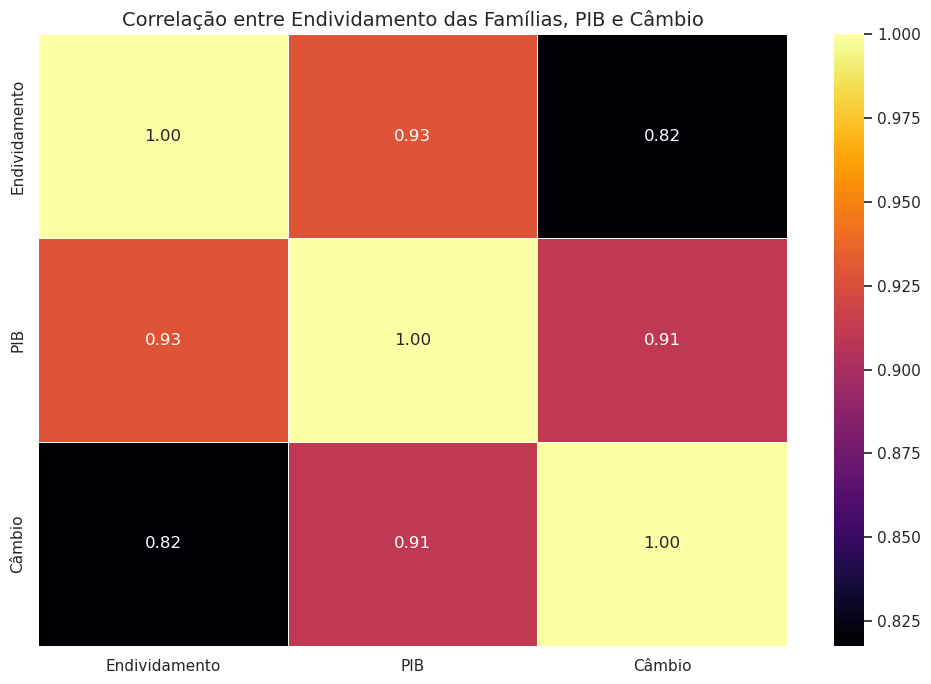

In [222]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("dataset_unificado.csv")
df["Data"] = pd.to_datetime(df["Data"], format="%m/%Y")

df["Endividamento"] = df["29037 - Endividamento das famílias com o Sistema Financeiro Nacional em relação à renda acumulada dos últimos doze meses (RNDBF) - %,"].astype(str).str.replace(",", ".").astype(float)
df["PIB"] = df["4380 - PIB mensal - Valores correntes (R$ milhões) - R$ (milhões)"].astype(str).str.replace(".", "", regex=False).str.replace(",", ".", regex=False).astype(float)
df["Câmbio"] = df["3695 - Taxa de câmbio - Livre - Dólar americano (compra) - Fim de período - mensal - u.m.c./US$"].astype(str).str.replace(",", ".").astype(float)

df_corr = df[["Endividamento", "PIB", "Câmbio"]]

matriz_correlacao = df_corr.corr()

#heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(matriz_correlacao, annot=True, cmap="inferno", fmt=".2f", linewidths=0.5)
plt.title("Correlação entre Endividamento das Famílias, PIB e Câmbio", fontsize=14)
plt.tight_layout()
plt.show()




In [223]:
#Medidas sobre Endividamento e Taxa de Juros

média_endividamento = np.mean(endividamento)
média_taxa_de_juros = np.mean(selic)

dp_endividamento = np.std(endividamento)
dp_taxa_de_juros = np.std(selic)

#Correlação entre endividamento e taxa de juros
correlação_endiv_selic = np.corrcoef(endividamento, selic)[0,1]

print(média_endividamento)
print(média_taxa_de_juros)

print(dp_endividamento)
print(dp_taxa_de_juros)

print(correlação_endiv_selic)

38.25354545454546
9.894681818181818
7.217308436398967
3.299815475369433
-0.08059071151680144


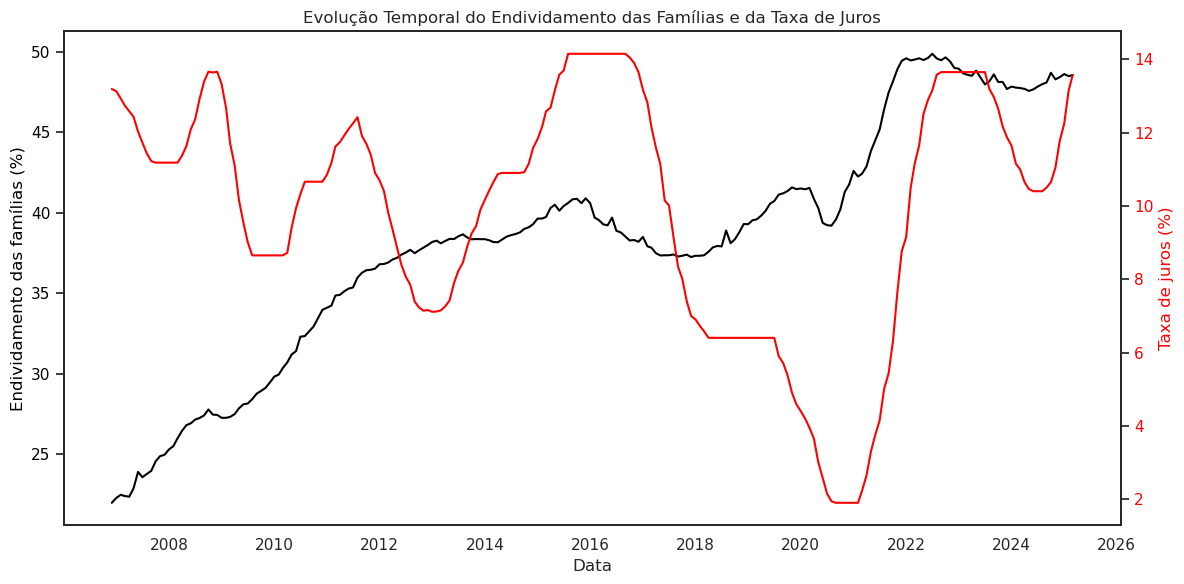

In [224]:
fig, ax1 = plt.subplots(figsize=(12, 6))

sns.lineplot(data=endividamento_e_selic, x="Data", y="Endividamento das famílias", ax=ax1, color="black")
ax1.set_ylabel("Endividamento das famílias (%)", color="black")
ax1.tick_params(axis='y', labelcolor="black")
ax1.grid(False)


# Segundo eixo Y (taxa de juros)
ax2 = ax1.twinx()

sns.lineplot(data=endividamento_e_selic, x="Data", y="Taxa de Juros", ax=ax2, color="red")
ax2.set_ylabel("Taxa de juros (%)", color="red")
ax2.tick_params(axis='y', labelcolor="red")
ax2.grid(False)

plt.title("Evolução Temporal do Endividamento das Famílias e da Taxa de Juros")
fig.tight_layout()

plt.show()




In [225]:
#Relação entre endividamento das famílias e PIB

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("dataset_unificado.csv")

df["Data"] = pd.to_datetime(df["Data"], format="%m/%Y")
endividamento = df["29037 - Endividamento das famílias com o Sistema Financeiro Nacional em relação à renda acumulada dos últimos doze meses (RNDBF) - %,"]
pib = df["4380 - PIB mensal - Valores correntes (R$ milhões) - R$ (milhões)"]

endividamento = endividamento.astype(str).str.replace(".", "", regex=False).str.replace(",", ".", regex=False).astype(float)
pib = pib.astype(str).str.replace(".", "", regex=False).str.replace(",", ".", regex=False).astype(float)

endividamento_e_pib = pd.DataFrame({"Data" : df["Data"], 
                                  "Endividamento das famílias" : endividamento, 
                                  "PIB" : pib

})

print(endividamento_e_pib)

          Data  Endividamento das famílias        PIB
0   2006-12-01                       21.98   215338.3
1   2007-01-01                       22.28   206662.3
2   2007-02-01                       22.48   201552.1
3   2007-03-01                       22.40   223208.6
4   2007-04-01                       22.36   218931.2
..         ...                         ...        ...
215 2024-11-01                       48.29  1027050.4
216 2024-12-01                       48.43  1003039.7
217 2025-01-01                       48.62   950827.4
218 2025-02-01                       48.49   977326.4
219 2025-03-01                       48.56  1063076.3

[220 rows x 3 columns]


In [226]:
#Medidas sobre Endividamento e PIB


média_endividamento = np.mean(endividamento)
média_pib = np.mean(pib)

dp_endividamento = np.std(endividamento)
dp_pib = np.std(pib)

#Correlação entre endividamento e taxa de juros
correlação_endiv_pib = np.corrcoef(endividamento, pib)[0,1]

print(correlação_endiv_pib)

rquadrado = correlação_endiv_pib ** 2
print(rquadrado)


0.9287494833232774
0.8625756027732548


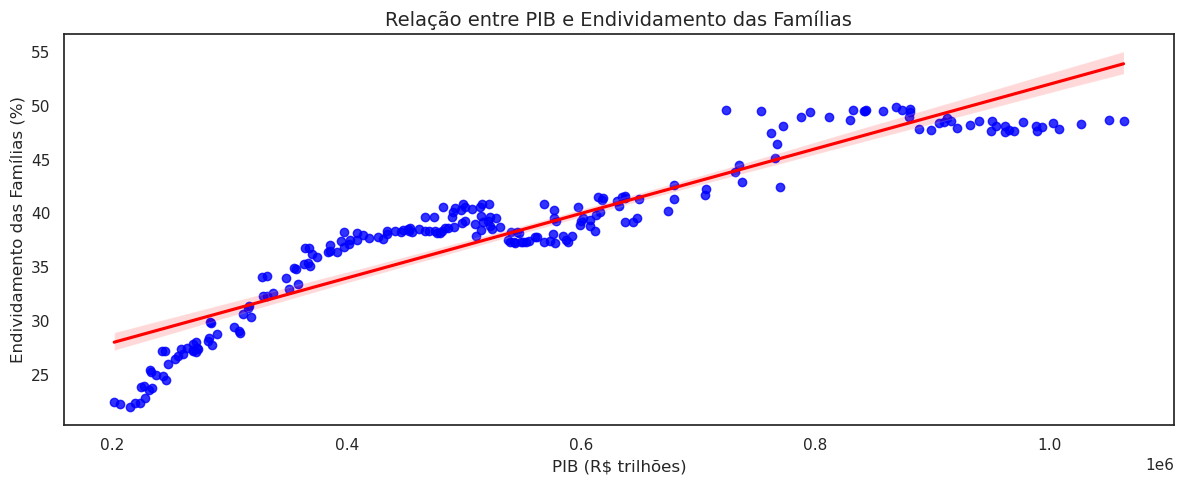

In [227]:
# Gráfico de regressão entre Endividamento das Famílias e PIB
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
sns.regplot(x=pib, y=endividamento, color='blue', line_kws={"color": "red"})
plt.title("Relação entre PIB e Endividamento das Famílias", fontsize=14)
plt.xlabel("PIB (R$ trilhões)")
plt.ylabel("Endividamento das Famílias (%)")
plt.grid(False)
plt.tight_layout()
plt.show()


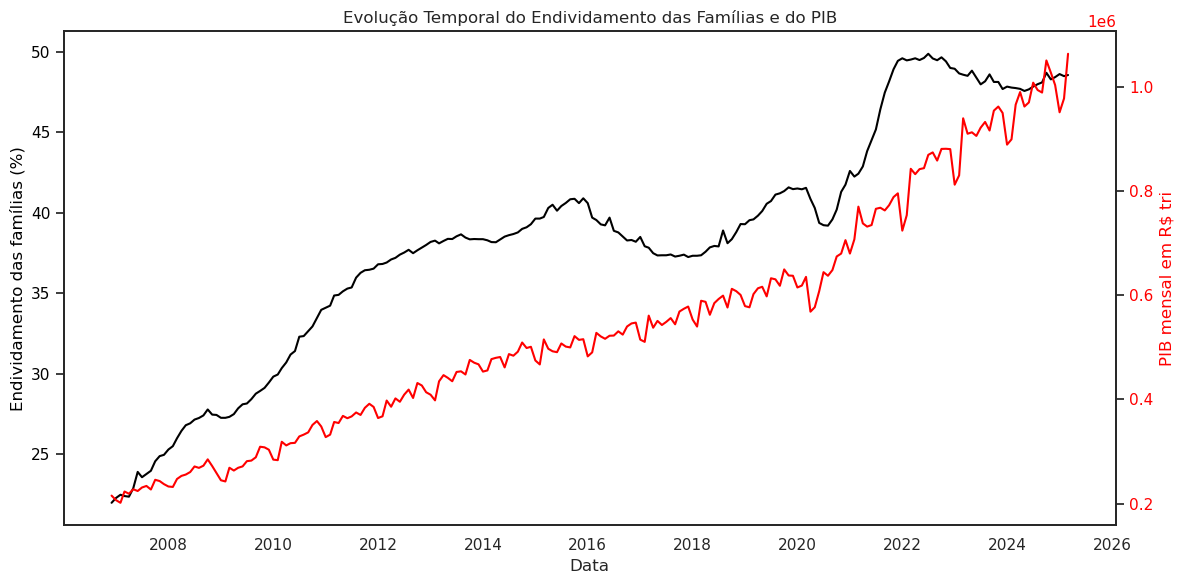

In [228]:

import matplotlib.pyplot as plt
import seaborn as sns


fig, ax1 = plt.subplots(figsize=(12, 6))

sns.lineplot(data=endividamento_e_pib, x="Data", y="Endividamento das famílias", ax=ax1, color="black")
ax1.set_ylabel("Endividamento das famílias (%)", color="black")
ax1.tick_params(axis='y', labelcolor="black")
ax1.grid(False)


ax2 = ax1.twinx()

sns.lineplot(data=endividamento_e_pib, x="Data", y="PIB", ax=ax2, color="red")
ax2.set_ylabel("PIB mensal em R$ tri", color="red")
ax2.tick_params(axis='y', labelcolor="red")
ax2.grid(False)

#Detalhes
plt.title("Evolução Temporal do Endividamento das Famílias e do PIB")
fig.tight_layout()

plt.show()